In [148]:

import datetime



import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from tensorflow.python.keras.layers import Dropout

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.unicode_minus'] = False

In [149]:

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [150]:
df = pd.read_csv('./data/best.csv', index_col = 0)
df['날짜'] = df['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df = df.set_index('날짜')

display(df)

,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
날짜,,,,,,,
2017-01-01,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...
2021-05-23,대파(일반),0.0,1883.0,1546.0,상,19.7,0.0
2021-05-24,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
2021-05-25,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0


In [151]:
df['평균가격'] = df['평균가격'].replace(0, np.NaN)
display(df)


,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
날짜,,,,,,,
2017-01-01,대파(일반),NaN,2164.0,0.0,상,4.3,0.0
2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...
2021-05-23,대파(일반),NaN,1883.0,1546.0,상,19.7,0.0
2021-05-24,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
2021-05-25,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0


In [152]:
df = df.fillna(df.mean())
df = df.round(1)
display(df)

,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
날짜,,,,,,,
2017-01-01,대파(일반),1937.3,2164.0,0.0,상,4.3,0.0
2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...
2021-05-23,대파(일반),1937.3,1883.0,1546.0,상,19.7,0.0
2021-05-24,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
2021-05-25,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2017-01-01 to 2021-05-27
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   품목명     1581 non-null   object 
 1   평균가격    1581 non-null   float64
 2   전일평균가격  1581 non-null   float64
 3   전년가격    1581 non-null   float64
 4   등급      1581 non-null   object 
 5   평균기온    1581 non-null   float64
 6   강수량     1581 non-null   float64
dtypes: float64(5), object(2)
memory usage: 98.8+ KB


<AxesSubplot:xlabel='날짜'>

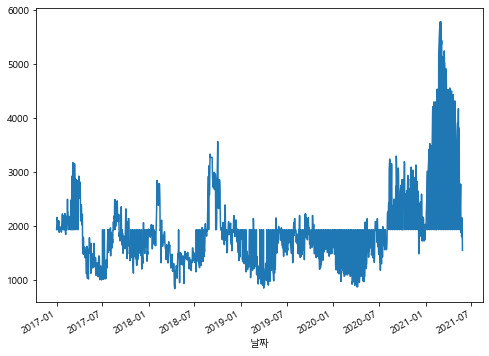

In [154]:
plt.rc('font', family='Malgun Gothic')
df['평균가격'].plot()

### 훈련 데이터와 테스트 데이터 분리하기

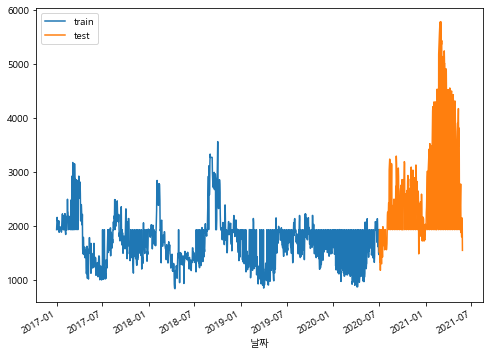

In [155]:
split_date = pd.Timestamp('2020-07-01')

idx = pd.IndexSlice
train = df['평균가격'].loc[idx[:'2020-07-01']]
test = df['평균가격'].loc[idx['2020-07-01':]]

ax = train.plot()
test.plot(ax= ax)
plt.legend(['train', 'test'])

In [156]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train1 = train.values.reshape(-1,1)
test1 = test.values.reshape(-1,1)
train_sc = sc.fit_transform(train1)
test_sc = sc.transform(test1)

In [157]:
display(train_sc)

array([[0.40128582],
       [0.48457017],
       [0.46105805],
       ...,
       [0.24173402],
       [0.23181484],
       [0.25018369]])

In [158]:
train_sc_df = pd.DataFrame(train_sc, columns=['평균가격'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['평균가격'], index = test.index)
display(train_sc_df.head())

,평균가격
날짜,
2017-01-01,0.401286
2017-01-03,0.484570
2017-01-04,0.461058
2017-01-05,0.461058
2017-01-06,0.461058


In [159]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['평균가격'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['평균가격'].shift(s)

train_sc_df.head(13)

,평균가격,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
날짜,,,,,,,,,,,,,
2017-01-01,0.401286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.461058,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.461058,0.461058,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07,0.401286,0.461058,0.461058,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.461058,0.401286,0.461058,0.461058,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,0.461058,0.461058,0.401286,0.461058,0.461058,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN,NaN
2017-01-11,0.383542,0.461058,0.461058,0.401286,0.461058,0.461058,0.461058,0.484570,0.401286,NaN,NaN,NaN,NaN


In [160]:
X_train = train_sc_df.dropna().drop('평균가격', axis = 1)
y_train = train_sc_df.dropna()[['평균가격']]

X_test = test_sc_df.dropna().drop('평균가격', axis = 1)
y_test = test_sc_df.dropna()[['평균가격']]

display(X_train.head())

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
날짜,,,,,,,,,,,,
2017-01-16,0.401286,0.418442,0.415136,0.383542,0.461058,0.461058,0.401286,0.461058,0.461058,0.461058,0.484570,0.401286
2017-01-17,0.418442,0.401286,0.418442,0.415136,0.383542,0.461058,0.461058,0.401286,0.461058,0.461058,0.461058,0.484570
2017-01-18,0.418442,0.418442,0.401286,0.418442,0.415136,0.383542,0.461058,0.461058,0.401286,0.461058,0.461058,0.461058
2017-01-19,0.418442,0.418442,0.418442,0.401286,0.418442,0.415136,0.383542,0.461058,0.461058,0.401286,0.461058,0.461058
2017-01-20,0.391991,0.418442,0.418442,0.418442,0.401286,0.418442,0.415136,0.383542,0.461058,0.461058,0.401286,0.461058


In [161]:
print(type(X_train))
X_train = X_train.values
print(type(X_test))
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print('x_Train.shape\n', X_train.shape)
print('y_train.shape\n', y_train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
x_Train.shape
 (1240, 12)
y_train.shape
 (1240, 1)


In [162]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print('최종 DATA')
print(X_train_t.shape)
print(X_train_t)
print()
print(y_train)

최종 DATA
(1240, 12, 1)
[[[0.40128582]
  [0.41844232]
  [0.41513593]
  ...
  [0.46105805]
  [0.48457017]
  [0.40128582]]

 [[0.41844232]
  [0.40128582]
  [0.41844232]
  ...
  [0.46105805]
  [0.46105805]
  [0.48457017]]

 [[0.41844232]
  [0.41844232]
  [0.40128582]
  ...
  [0.46105805]
  [0.46105805]
  [0.46105805]]

 ...

 [[0.40128582]
  [0.34019104]
  [0.28581925]
  ...
  [0.39603233]
  [0.43423953]
  [0.45554739]]

 [[0.24173402]
  [0.40128582]
  [0.34019104]
  ...
  [0.44158707]
  [0.39603233]
  [0.43423953]]

 [[0.23181484]
  [0.24173402]
  [0.40128582]
  ...
  [0.40128582]
  [0.44158707]
  [0.39603233]]]

[[0.41844232]
 [0.41844232]
 [0.41844232]
 ...
 [0.24173402]
 [0.23181484]
 [0.25018369]]


In [163]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [164]:
K.clear_session()

model=Sequential()
model.add(LSTM(20, input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [165]:
early_stop = EarlyStopping(monitor = 'loss', patience=1, verbose=1)

history=model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 0.0988
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0104

In [166]:
train_sc_df.describe()

,평균가격,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,1252.000000,1251.000000,1250.000000,1249.000000,1248.000000,1247.000000,1246.000000,1245.000000,1244.000000,1243.000000,1242.000000,1241.000000,1240.000000
mean,0.307414,0.307459,0.307520,0.307573,0.307497,0.307471,0.307489,0.307387,0.307251,0.307245,0.307230,0.307154,0.307046
std,0.169088,0.169148,0.169202,0.169260,0.169307,0.169372,0.169439,0.169469,0.169470,0.169538,0.169605,0.169653,0.169678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185525,0.185525,0.185525,0.185525,0.185250,0.184974,0.184699,0.184423,0.184423,0.184423,0.184423,0.184423,0.184423
50%,0.282880,0.283248,0.283982,0.284717,0.283982,0.283248,0.282880,0.282513,0.282513,0.282513,0.282513,0.282513,0.282329
75%,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
test_sc_df.describe()

,평균가격,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,330.000000,329.000000,328.000000,327.000000,326.000000,325.000000,324.000000,323.000000,322.000000,321.000000,320.000000,319.000000,318.000000
mean,0.756973,0.758482,0.759331,0.760183,0.761434,0.762542,0.763719,0.764747,0.764912,0.765330,0.766012,0.767075,0.768225
std,0.399564,0.399229,0.399542,0.399855,0.399829,0.399943,0.399998,0.400190,0.400802,0.401357,0.401800,0.401980,0.402087
min,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908,0.124908
25%,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286,0.401286
50%,0.651359,0.651727,0.653196,0.654666,0.655033,0.655400,0.659258,0.663115,0.659258,0.663115,0.663483,0.663850,0.663850
75%,1.040228,1.056943,1.059331,1.061719,1.064107,1.066495,1.067046,1.067597,1.068148,1.068699,1.070720,1.072741,1.074761
max,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944,1.815944


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

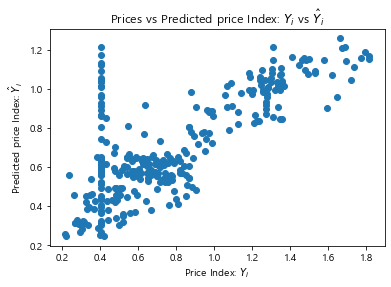

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=32)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [169]:
trainScore = model.evaluate(X_train_t, y_train, verbose=0)
print(trainScore)
testScore = model.evaluate(X_test_t, y_test, verbose=0)
print(testScore)

0.010171622969210148
0.07498063147068024


In [174]:
def plot_train_history(history, title):
    loss = history.history['loss']


    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label = 'Training loss')

    plt.title(title)
    plt.legend()

    plt.show()

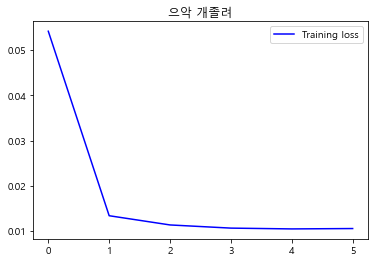

In [175]:
plot_train_history(history, '으악 개졸려')

In [177]:
model.predict(['2021-06-10'])

ValueError: in user code:

    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
